In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axisartist.axislines import SubplotZero
import math

Figure 16.1: The unimolecular reaction rate as a function of pressure

In [ ]:
# Rate constants
k_2 = 10**(-5)
k_a = 10**(-4)
# Pressure
P_species = np.linspace(0.1, 5*10**5, 5*10**6)

# unimolecular rate constant divided by rate constant at high pressure limit
k_uni_infy =k_2/(k_2+(k_a/P_species))

# log10(pressure)
P_log = []
for p in P_species:
    p_log = math.log10(p)
    P_log.append(p_log)
P_log = np.array(P_log)

# log10(k_uni_infty)
K_log = []
for k in k_uni_infy:
    k_log = math.log10(k)
    K_log.append(k_log)
K_log = np.array(K_log)

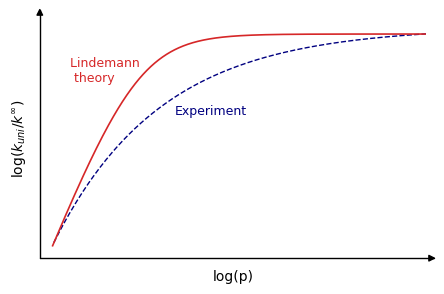

In [ ]:
fig = plt.figure(figsize = (4.5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Lindemann theory
ax.plot(P_log[4:]+0.5, K_log[4:]+1.4, color = 'tab:red', lw = 1.2)
ax.text(0.47, 1.1, 'Lindemann \n theory', color = 'tab:red', fontsize = 9)
# Experiment
ax.plot(P_log[3:3800000]+0.615, -0.55**(P_log[3:3800000]-0.1)+1.4435, color = 'navy', ls = '--', lw = 1, zorder = -10)
ax.text(2.1, 0.9, 'Experiment', color = 'navy', fontsize = 9)

ax.set_xlim(0, 6)
ax.set_ylim(0, 1.5)

ax.set_xlabel('log(p)')
ax.set_ylabel('log($k_{uni}/k^{\infty}$)')

plt.tight_layout()
plt.savefig('falloff.png', dpi=150)
plt.show()